In [1]:
# This notebook compares the output of SV callers in Venn and UpSetR diagrams.
# It uses VCF files obtained after SURVIVOR filtering/merging steps.
#
# Commands:
#   SURVIVOR filter [VCF] ENCFF001TDO.bed -1 -1 0 -1 [VCF]
#   ...
#   SURVIVOR merge [TXT] 100 1 0 0 0 0 [VCF]
#
# Input datasets: COLO829 and NA12878

In [2]:
library(ggplot2)

In [3]:
library(venn)

In [4]:
library(UpSetR)

Warning message:
“package ‘UpSetR’ was built under R version 3.3.2”

In [5]:
library(vcfR)

Warning message:
“package ‘vcfR’ was built under R version 3.3.2”
   *****       ***   vcfR   ***       *****
   This is vcfR 1.6.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****



In [6]:
library(tools)

In [7]:
paths<-c("benchmark/compare/callers", "cell_lines/compare/callers", "benchmark/compare/samples", "cell_lines/compare/samples")

In [8]:
callers<-c("all", "manta", "delly", "lumpy", "gridss")

In [9]:
# allowed combinations of
# ipath icaller
# 1     1
# 2     1
# 3     2
# 3     3
# 3     4
# 3     5
# 4     2
# 4     3
# 4     4
# 4     5

In [10]:
ipath<-1

In [11]:
icaller<-1

In [12]:
sets<-read.table(paste(paths[ipath], paste0(callers[icaller], ".txt"), sep="/"), colClasses="character")

In [13]:
if (ipath < 3) {
    sets<-toupper(gsub("(\\d+)\\/.*\\/(.*)", "\\2", file_path_sans_ext(sets$V1)))
} else {
    sets<-toupper(gsub("(\\d+)\\/.*\\/(.*)", "\\2-\\1", file_path_sans_ext(sets$V1)))
}

In [14]:
#sets

In [15]:
nsets<-length(sets)

In [16]:
vcf<-read.vcfR(paste(paths[ipath], paste0(callers[icaller], ".vcf.gz"), sep="/"), verbose = FALSE)

In [17]:
binvec<-sapply(strsplit(sapply(strsplit(getFIX(vcf, getINFO=TRUE)[, 'INFO'], ";"),
                       function(x) {x[2]}), '='), function (x) {x[2]})

In [18]:
#binvec

In [19]:
sets_sz<-data.frame(matrix(ncol=2, nrow=nsets))

In [20]:
names(sets_sz)<-c('caller', 'n')

In [21]:
for (i in 1:nsets) {
    s<-rep('.',nsets)
    s<-paste(replace(s,i,1), collapse='')
    re<-paste('^',s,'$', sep='')
    caller<-sets[i]
    n<-length(grep(s,binvec))
    sets_sz[i,]<-c(caller, n)
    #print(paste(caller, n))
}

In [22]:
#sets_sz

In [23]:
vec<-table(sapply(binvec, function(x) {strtoi(x, base=2)}))

In [24]:
#vec

In [25]:
lst<-strsplit(binvec, '')

In [26]:
#lst

In [27]:
s<-as.character(seq(0,(2**nsets-1)))

In [28]:
#s

In [29]:
N<-sapply(s, function(x){vec[x]}, USE.NAMES=FALSE)

In [30]:
N[is.na(N)]<-0

In [31]:
#N

In [32]:
slabels<-paste0(sets_sz$caller, ' (', sets_sz$n, ')')

In [33]:
options(jupyter.plot_mimetypes = 'image/svg+xml') #image/png

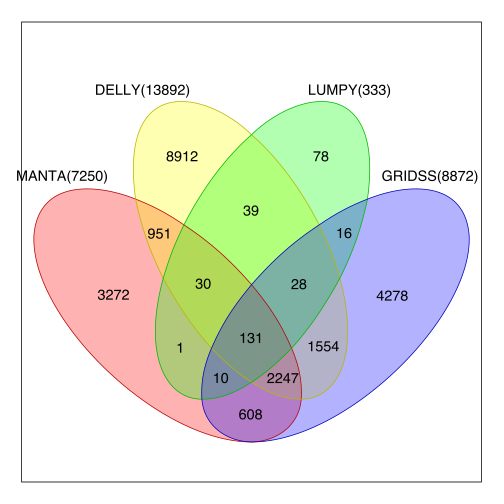

In [34]:
if (icaller == 1)
{
    venn(nsets, counts=N, snames=slabels, ilabels=TRUE, cexil=1.2, cexsn=1.2, zcolor="style", ellipse=TRUE)
}

In [35]:
nr<-length(lst)

In [36]:
#nr

In [37]:
nc<-length(lst[[1]])

In [38]:
#nc

In [39]:
M<-matrix(0, nrow=nr, ncol=nc)

In [40]:
for (i in 1:nr)
{
  M[i, ] <- as.integer(lst[[i]])
}

In [41]:
#M

In [42]:
sv<-data.frame(ID = getFIX(vcf)[, 'ID'], M)

In [43]:
#colnames(sv)

In [44]:
colnames(sv)[-1]<-slabels

In [45]:
#colnames(sv)

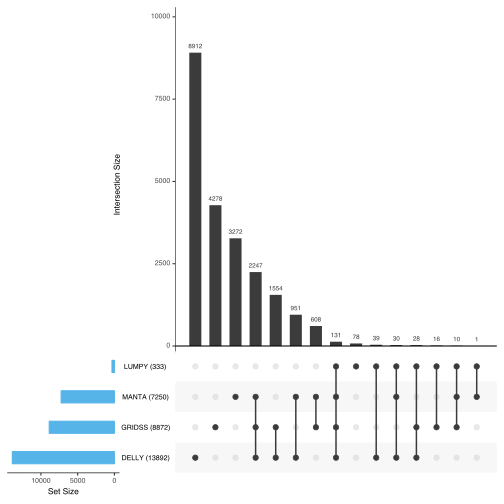

In [46]:
upset(sv, nsets=nsets, sets.bar.color="#56B4E9", order.by="freq")